
ASSN - 8 : Ensemble Techniques


Name : V TEJAS

Register number : 3122 21 5001 116

Class : CSE - B

## 1. Loading the Dataset

- The dataset is imported using the `fetch_ucirepo` function from the `ucimlrepo` library.
- The features and target labels are extracted from the dataset and stored in separate variables.


In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install ucimlrepo

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from ucimlrepo import fetch_ucirepo


# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets



# Extract features and target variable
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets
column_names = list(breast_cancer_wisconsin_diagnostic.data.features.columns)
target_column_name=list(breast_cancer_wisconsin_diagnostic.data.targets.columns)




In [33]:
# Display features and targets
print("Features:")
print(X.head())


Features:
   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0      0.3001          0.14710     0.2419             0.07871  ...    25.38   
1      0.0869          0.07017     0.1812             0.05667  ...    24.99   
2      0.1974          0.12790     0.2069             0.05999  ...    23.57   
3      0.2414          0.10520     0.2597             0.09744  ...    14.91   
4      0.1980          0.10430     0.1809             0.05883  ...    22.54   

   texture3  perimeter3   area3  smoothness3  compactness3  concavity3  \
0     17.33   

In [34]:
print("Targets:")
print(y.head())

Targets:
  Diagnosis
0         M
1         M
2         M
3         M
4         M


## 2. Pre-processing the data

- The dataset is checked for missing values to ensure data completeness.
- Since there are no missing values in the dataset, no imputation or replacement of missing values is performed.
- Non-numeric columns in the dataset are encoded into numeric values using label encoding.
- Numeric features in the dataset are standardized using `StandardScaler` to have a mean of 0 and a standard deviation of 1.
- Numeric features in the dataset are normalized using `MinMaxScaler` to scale each feature to a specified range.


### Handling Missing Values

In [35]:
# Check for missing values in the DataFrame
missing_values = X.isnull().sum()

# Check if there are any missing values in each column
columns_with_missing_values = missing_values[missing_values > 0]

if columns_with_missing_values.empty:
    print("No missing values in the DataFrame")
else:
    print("Columns with missing values:")
    print(columns_with_missing_values)




No missing values in the DataFrame


### Encoding

In [36]:

# Encoding non-numeric columns
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = pd.DataFrame(y, columns=target_column_name)
X = pd.DataFrame(X, columns=column_names)
X = X.apply(label_encoder.fit_transform)




/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
print("Features after Handling Missing Values & Encoding:")
print(X.head())


Features after Handling Missing Values & Encoding:
   radius1  texture1  perimeter1  area1  smoothness1  compactness1  \
0      370         1         455    452          444           531   
1      426       186         486    513          120           215   
2      406       324         478    487          403           459   
3       98       297         164     95          471           533   
4      418        60         493    506          332           414   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0         521              526        416                 483  ...      425   
1         321              396        219                  91  ...      419   
2         478              516        348                 184  ...      399   
3         507              493        426                 498  ...      215   
4         480              492        216                 147  ...      381   

   texture3  perimeter3  area3  smoothness3  compactn

In [38]:
print("Target after encoding")
print(y.head())


Target after encoding
   Diagnosis
0          1
1          1
2          1
3          1
4          1


### Standardization

In [39]:

# Standardization
scaler = StandardScaler()
X = scaler.fit_transform(X)
X=pd.DataFrame(X, columns=column_names)
print("DataFrame Head after Standardization:")
print(X.head())


DataFrame Head after Standardization:
    radius1  texture1  perimeter1     area1  smoothness1  compactness1  \
0  1.196981 -1.769781    1.262401  1.185948     1.402109      1.684613   
1  1.642627 -0.381605    1.467872  1.580813    -0.977959     -0.367473   
2  1.483468  0.653899    1.414847  1.412510     1.100928      1.217049   
3 -0.967585  0.451301   -0.666374 -1.124982     1.600448      1.697601   
4  1.578964 -1.327065    1.514268  1.535500     0.579370      0.924822   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...   radius3  \
0    1.628561         1.639570   1.742953            1.703467  ...  1.619255   
1    0.363767         0.823778   0.075337           -1.082085  ...  1.571594   
2    1.356631         1.576817   1.167330           -0.421227  ...  1.412723   
3    1.540026         1.432484   1.827604            1.810057  ... -0.048890   
4    1.369279         1.426209   0.049942           -0.684149  ...  1.269739   

   texture3  perimeter3     area3  s

### Normalization

In [40]:

# Normalization
minmax_scaler = MinMaxScaler()
X = minmax_scaler.fit_transform(X)
X=pd.DataFrame(X, columns=column_names)
print("DataFrame Head after Normalization:")
print(X.head())


DataFrame Head after Normalization:
    radius1  texture1  perimeter1     area1  smoothness1  compactness1  \
0  0.813187  0.002092    0.873321  0.840149     0.938689      0.990672   
1  0.936264  0.389121    0.932821  0.953532     0.253700      0.401119   
2  0.892308  0.677824    0.917466  0.905204     0.852008      0.856343   
3  0.215385  0.621339    0.314779  0.176580     0.995772      0.994403   
4  0.918681  0.125523    0.946257  0.940520     0.701903      0.772388   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...   radius3  \
0    0.972015         0.972274   0.965197            0.969880  ...  0.932018   
1    0.598881         0.731978   0.508121            0.182731  ...  0.918860   
2    0.891791         0.953789   0.807425            0.369478  ...  0.875000   
3    0.945896         0.911275   0.988399            1.000000  ...  0.471491   
4    0.895522         0.909427   0.501160            0.295181  ...  0.835526   

   texture3  perimeter3     area3  smo

## 3. Exploratory Data Analysis

- Visualization techniques such as pie charts are used to visualize the distribution of categorical variables, such as the target variable.
- Scatter plots are utilized to explore relationships between pairs of numeric features, allowing for the identification of potential correlations or patterns.
- Heatmaps are generated to visualize the correlation matrix between features, providing insights into the strength and direction of relationships among variables.


### Pie-Chart for target Variable

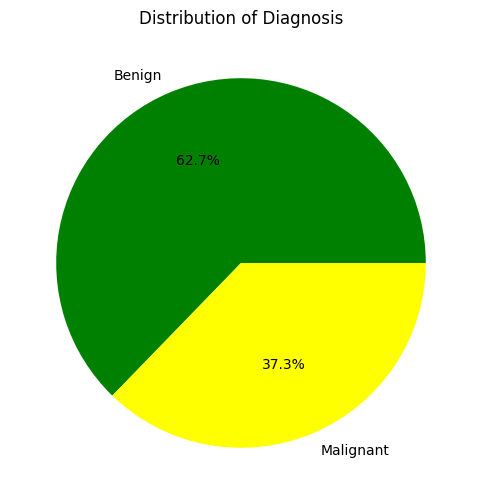

In [41]:
# Pie chart for target variable

plt.figure(figsize=(6, 6))
y_labels = label_encoder.inverse_transform([0, 1])
y_1d = y.squeeze()  # Convert y to 1D array
plt.pie(np.bincount(y_1d), labels=['Benign', 'Malignant'], autopct='%1.1f%%', colors=['green', 'yellow'])
plt.title('Distribution of Diagnosis')
plt.show()


### Pairwise scatter plot for first 5 features

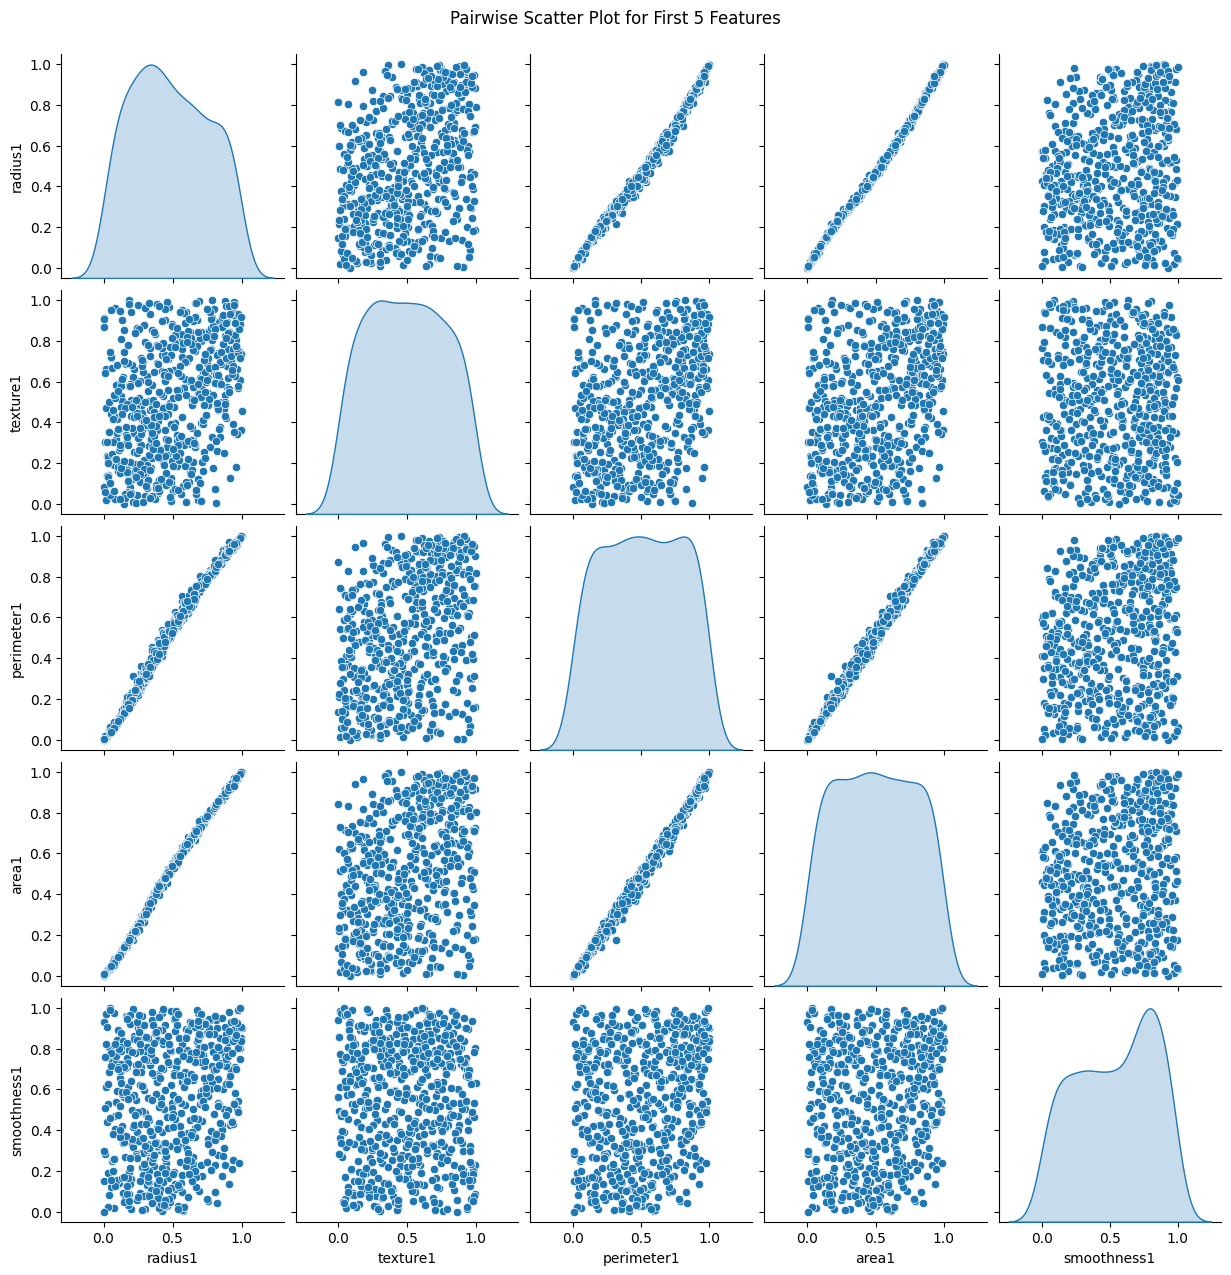

In [42]:

# Pairwise scatter plot for first 5 features
sns.pairplot(X.iloc[:, :5], diag_kind='kde')
plt.suptitle('Pairwise Scatter Plot for First 5 Features', y=1.02)
plt.show()


### Correlation heatmap

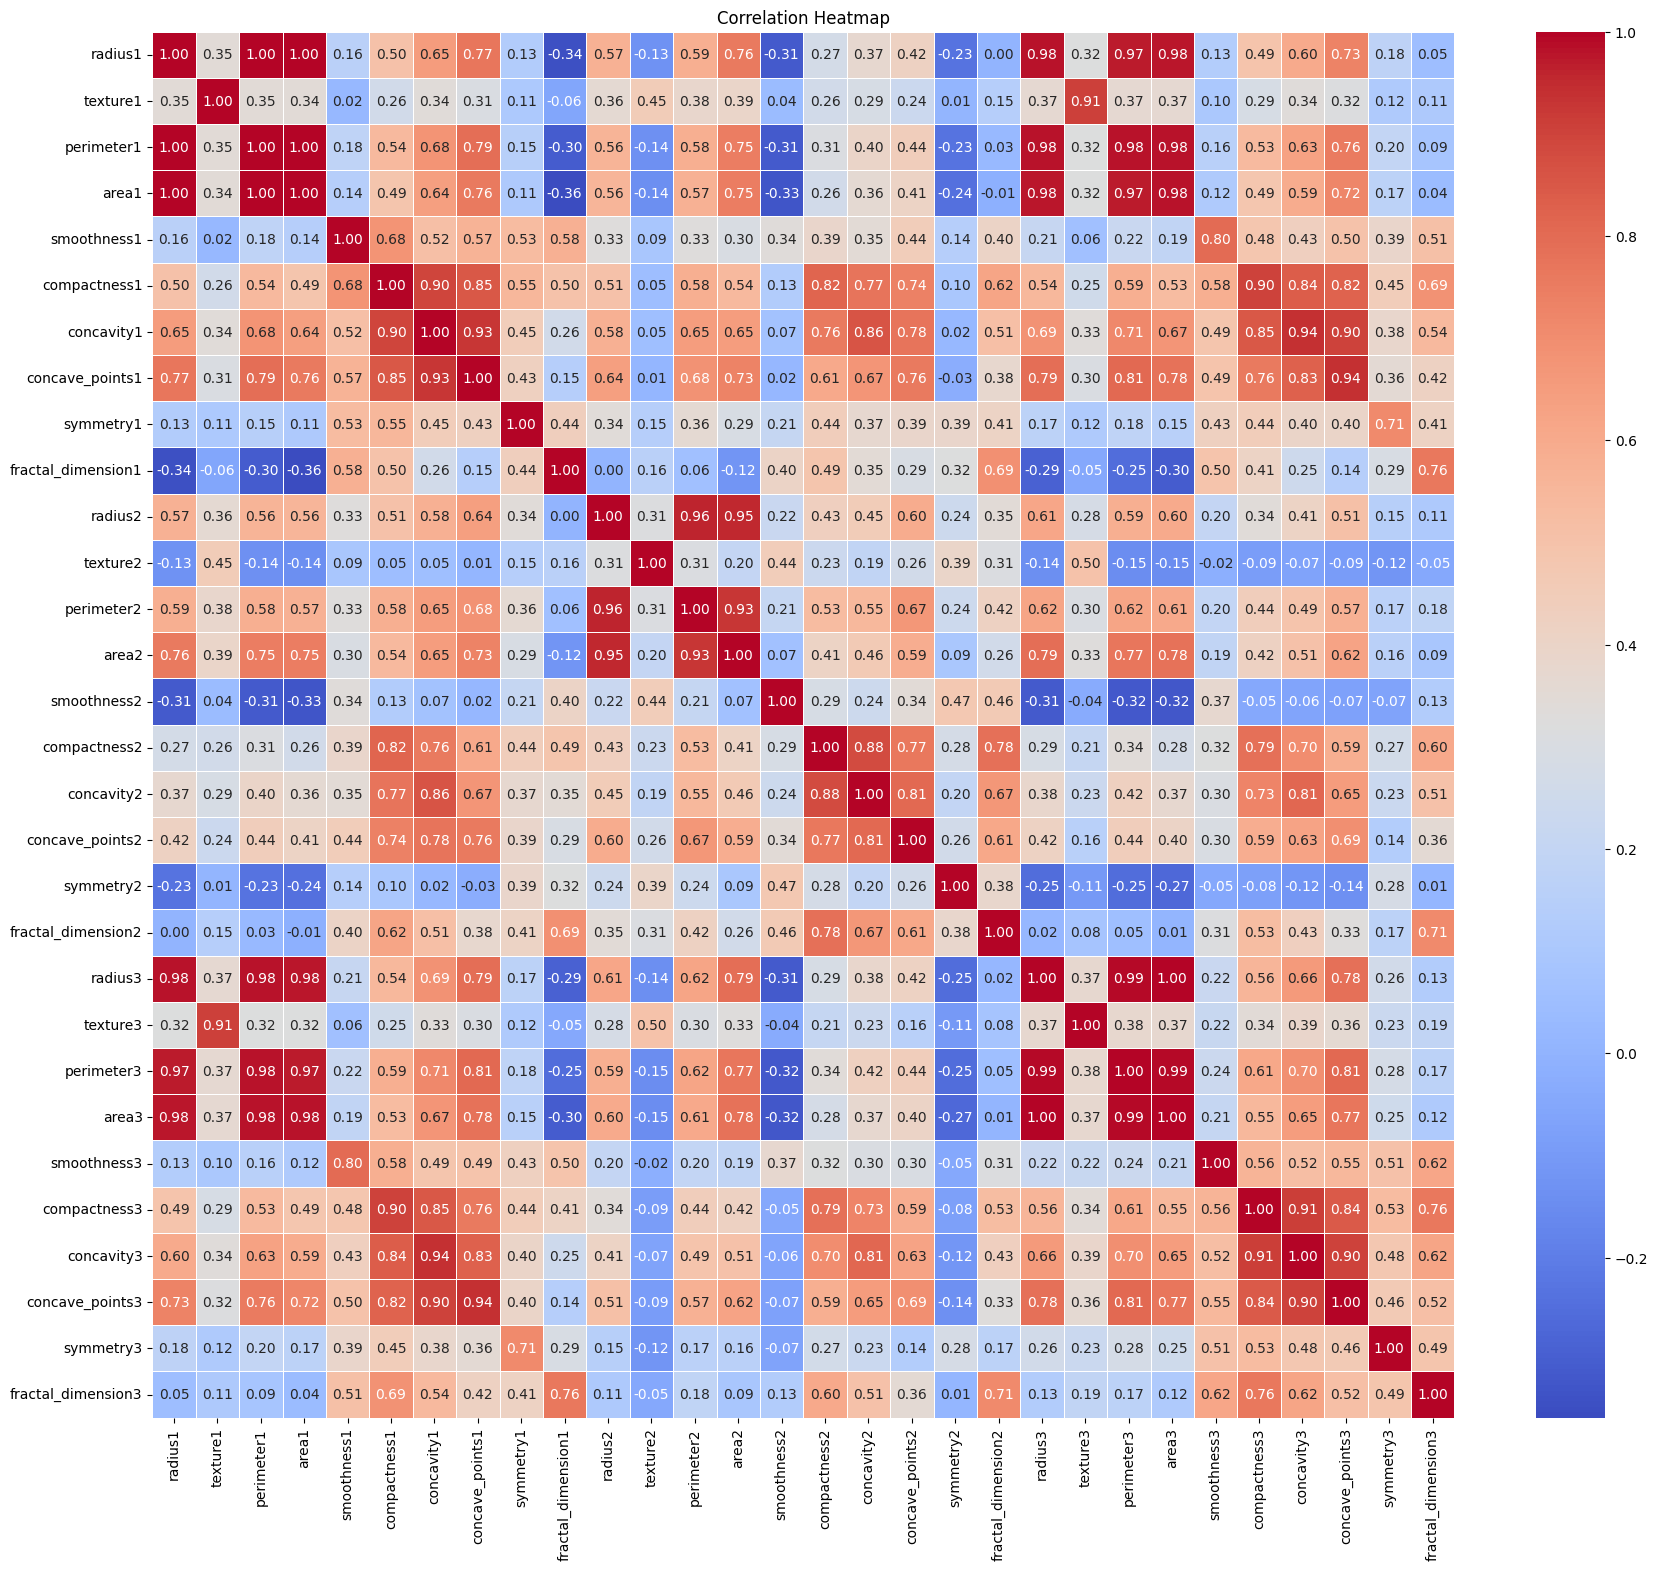

In [43]:
# Correlation heatmap
plt.figure(figsize=(21, 18))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


## 4. Feature Engineering Techniques (Selecting best k features)

- Feature engineering techniques are applied to select the most relevant features for modeling.
- The `SelectKBest` method from scikit-learn's `feature_selection` module is used to select the top k features based on their scores computed using the ANOVA F-value (`f_classif`) metric.
- In this example, 20 top features are selected using the `SelectKBest` method and transformed accordingly.


In [44]:
from sklearn.feature_selection import SelectKBest, f_classif

# Using SelectKBest for feature selection
k = 20  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X= selector.fit_transform(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 5. Split the data into training, testing and validation sets.

- The dataset is split into training and testing sets using the `train_test_split` function to evaluate model performance on unseen data.



In [45]:

# Task 5: Split the data into training, testing, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 6. Train the Model

- Ensemble models such as Bagging, Random Forest, and AdaBoost are trained on the training data using scikit-learn's implementation of these algorithms.
- Each ensemble model learns to predict the target labels based on the input features.


In [46]:

# Task 6: Train the model
# Ensemble Models: Bagging, Random Forest, AdaBoost
bagging_clf = BaggingClassifier(random_state=40)
bagging_clf.fit(X_train, y_train)

rf_clf = RandomForestClassifier(random_state=40)
rf_clf.fit(X_train, y_train)

adaboost_clf = AdaBoostClassifier(random_state=40)
adaboost_clf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-46-ec28628aa146>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(random_state=40)

## 7. Test the Model

- The trained models are used to make predictions on the test data to evaluate their performance.
- The predictions are compared to the true labels to assess the accuracy and effectiveness of the models.


In [47]:

# Task 7: Test the model
y_pred_bagging = bagging_clf.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
y_pred_adaboost = adaboost_clf.predict(X_test)


## 8. Measure the performance of the trained model

- The accuracy of each ensemble model is calculated using scikit-learn's `accuracy_score` function.
- The accuracy metric quantifies the proportion of correctly classified instances in the test set.


In [48]:

# Task 8: Measure the performance of the trained model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("#########ACCURACY#########")
print(f"Bagging: {accuracy_bagging}")
print(f"Random Forest: {accuracy_rf}")
print(f"AdaBoost: {accuracy_adaboost}")


#########ACCURACY#########
Bagging: 0.9532163742690059
Random Forest: 0.9707602339181286
AdaBoost: 0.9590643274853801


## 9. Compare the results of each ensemble model using graphs

- Graphs such as bar plots or box plots can be used to compare the performance metrics (e.g., accuracy) of different ensemble models.
- Another visualization technique, like confusion matrices or precision-recall curves, can provide insights into the models' strengths and weaknesses.


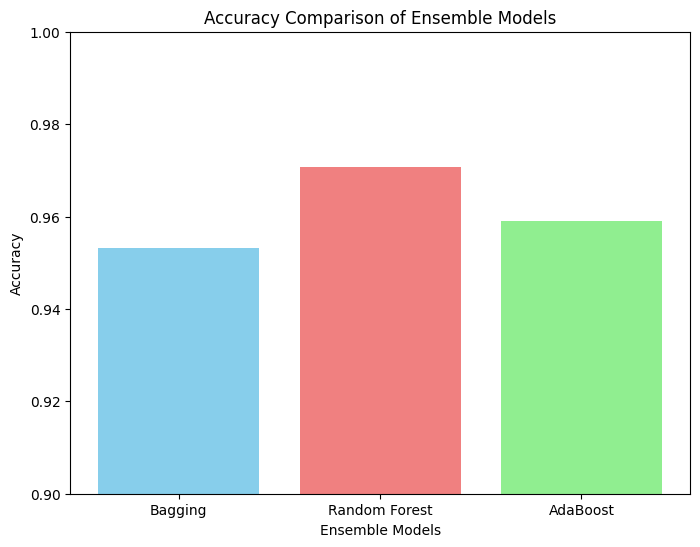

In [49]:

# Task 9: Compare the results of each ensemble model using graphs
# Bar plot for accuracy comparison
models = ['Bagging', 'Random Forest', 'AdaBoost']
accuracies = [accuracy_bagging, accuracy_rf, accuracy_adaboost]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Ensemble Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Ensemble Models')
plt.ylim(0.9, 1.0)
plt.show()


### Confusion Matrix

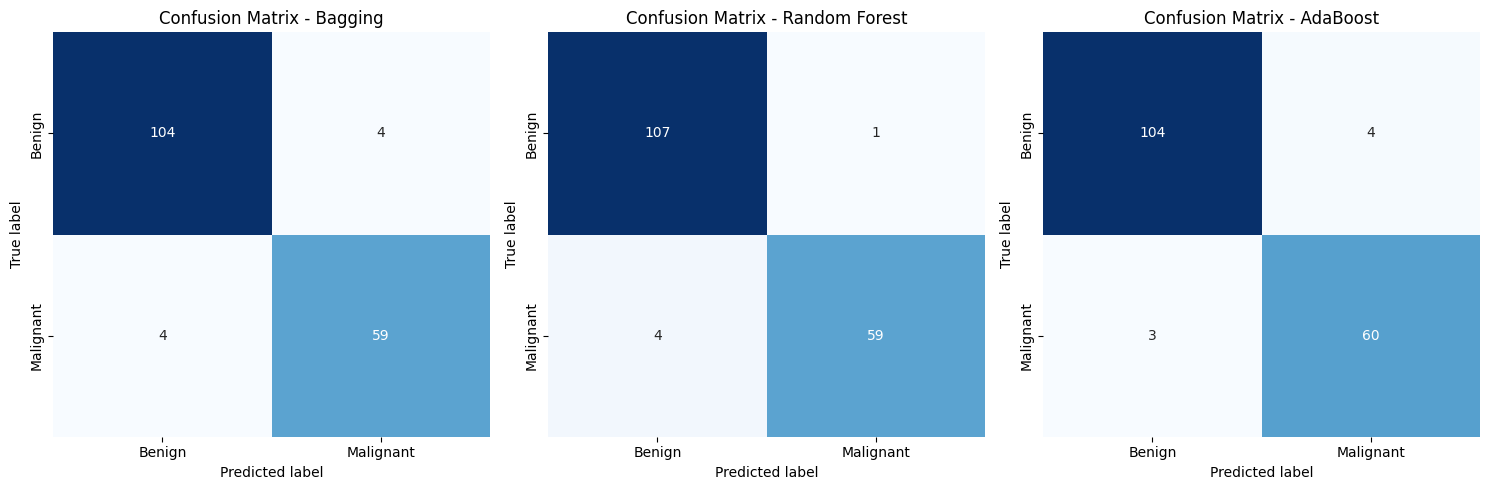

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plot confusion matrix for each model
plt.figure(figsize=(15, 5))
for i, (clf, name) in enumerate([(bagging_clf, 'Bagging'), (rf_clf, 'Random Forest'), (adaboost_clf, 'AdaBoost')], 1):
    plt.subplot(1, 3, i)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
plt.tight_layout()
plt.show()


## 10. Represent the ROC of training and test results in the graphs

- Receiver Operating Characteristic (ROC) curves are plotted for each ensemble model to visualize their performance in terms of true positive rate (sensitivity) and false positive rate.
- The Area Under the ROC Curve (AUC) is calculated to quantify the model's discrimination ability between the positive and negative classes.


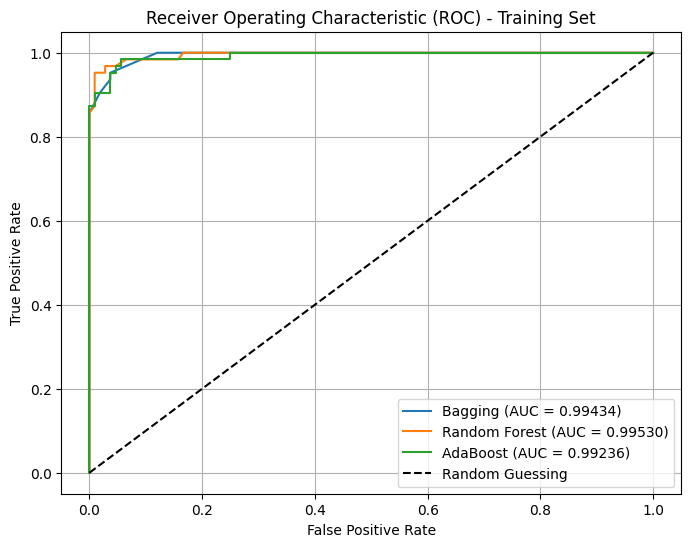

In [51]:

# Task 10: Represent the ROC of training and test results in the graphs
# Calculate ROC curves for training set
plt.figure(figsize=(8, 6))
for clf, name in [(bagging_clf, 'Bagging'), (rf_clf, 'Random Forest'), (adaboost_clf, 'AdaBoost')]:
    y_score = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.5f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Training Set')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Inference
- Random Forest achieved the highest accuracy among the three ensemble models, with an accuracy of 97.08%.
- Bagging and AdaBoost both achieved slightly lower accuracies, with Bagging at 95.32% and AdaBoost at 95.91%.
- Despite the differences in accuracy, all three models demonstrated excellent performance, with AUC scores above 0.99.
- Both Bagging and Random Forest models exhibited similar AUC scores, with Random Forest slightly outperforming Bagging by a small margin.
- AdaBoost, while achieving a slightly lower accuracy compared to Random Forest, still showed a strong AUC score, indicating good discrimination between classes.
- Overall, all three ensemble models performed well in diagnosing breast cancer, with Random Forest showing a slight advantage in accuracy and AUC.
